In [ ]:
%load_ext autoreload
%autoreload 2

# CENG 462 Take Home Exam 2 - e1942010 Tugca Eker

In this take home exam you are expected to implement three algorithm to solve a [sudoku](https://en.wikipedia.org/wiki/Mathematics_of_Sudoku) puzzle. These are depth-first search, iterative deepening depth-first search and best-first search. Best-first search strategy should be choosen and justified by you.

In [ ]:
from utils import *
from solver import *

There are few functions given in *utils.py* which you **have** to use. First is *get_puzzles_from_file* to read puzzles from a file. The File given with the exam includes multiple puzzles. Puzzle cells are given in row order and "." signifies empty cells.

In [ ]:
ps = get_puzzles_from_file("hard95.txt")
print(ps[0])

4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......


Second and last function you have to use is *gen_state_from_str* function that generates a dictionary of strings that represents a state of the puzzle. This restriction is here to force you to use a *dict* of strings to represent your puzzle states.

In [ ]:
state = gen_state_from_str(ps[0])

*print_grid* function prints the grid for a given state. As you can see grid cells can hold multiple choices for a given state.

In [5]:
print_grid(state)

+------------------------------+------------------------------+------------------------------+
|    4     123456789 123456789 |123456789 123456789 123456789 |    8     123456789     5     |
|123456789     3     123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 |
|123456789 123456789 123456789 |    7     123456789 123456789 |123456789 123456789 123456789 |
+------------------------------+------------------------------+------------------------------+
|123456789     2     123456789 |123456789 123456789 123456789 |123456789     6     123456789 |
|123456789 123456789 123456789 |123456789     8     123456789 |    4     123456789 123456789 |
|123456789 123456789 123456789 |123456789     1     123456789 |123456789 123456789 123456789 |
+------------------------------+------------------------------+------------------------------+
|123456789 123456789 123456789 |    6     123456789     3     |123456789     7     123456789 |
|    5     123456789 123456789 |    2     12345678

*gen_valid_choices* function is given to be an example of how to determine valid choices in a cell from already determined ones. It is not direcly to be used in your algorithms. For the previously shown puzzle state the cell *(0,1)* can have following values.

In [6]:
gen_valid_choices((0,1),state)

6179


To assign the possible values we can use the following code:

In [7]:
state[(0,1)] = "1796"
print_grid(state)

+------------------------------+------------------------------+------------------------------+
|    4        1796   123456789 |123456789 123456789 123456789 |    8     123456789     5     |
|123456789     3     123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 |
|123456789 123456789 123456789 |    7     123456789 123456789 |123456789 123456789 123456789 |
+------------------------------+------------------------------+------------------------------+
|123456789     2     123456789 |123456789 123456789 123456789 |123456789     6     123456789 |
|123456789 123456789 123456789 |123456789     8     123456789 |    4     123456789 123456789 |
|123456789 123456789 123456789 |123456789     1     123456789 |123456789 123456789 123456789 |
+------------------------------+------------------------------+------------------------------+
|123456789 123456789 123456789 |    6     123456789     3     |123456789     7     123456789 |
|    5     123456789 123456789 |    2     12345678

You must give your implementations in a seperate *.py* file and you must give explanations of your algorithms here. Statitics for run time, number of states generated for a solution (states that has been traversed) for your algorith nust be generated for the puzzles given with the file.

You can use *%time* magic function for timing your implementations.

In [8]:
%time gen_valid_choices((0,1),state)

6179
Wall time: 0 ns


# ANSWERS

**Some Explanation & Definitions**
===================

Before answering given questions, I want to explain some methods and ideas which I worked on.


1) Helper Functions
-------------

As a initial point; I created following functions;

**hasContradiction(myState):**

This function iterates over all cells of sudoku and checks whether there are any contradiction (gap) or not.
    
**isCompleted(myState):**

This function iterates over all cells of sudoku and checks whether all cells have only "single" probability. If yes, it means that we solved sudoku successfully.
    
**get_all_set(i):**

This function combines 3 function given on homework util file. (get_row_set, get_col_set, get_block_set)

**totalPossibility(myState):**

This function calculates number of the possibilities on sudoku. I'm using it while profiling and writing report.

**initAdjList():**

By using some profiling tools, I applied some analysis on my code at running time. I realized that, most of the cycles spent on get_col_set, get_row_set, get_block_set, get_all_set. So I decided that I will use memory (pre-calculated / pre-filled arrays) instead of CPU cycles. In this way, I reduced running time to half of the previous one.

2) Constraint Propagation & Some Improvements
-------------

For all three algorithm, we should follow same "Constraint Propagation" rules. Actually, anybody who solves sudoku (with or without computation) should follow these process to reach correct solution. In sudoku, we have 81 cell and single constraint. "Fill empty squares so each number appears exactly once in every row, column and block.". If we find solution for any cell; by following this single constraint, we should "propagate" it to other cells. 

Actually the function "gen_valid_choices(c,state):" given on homework file, propagates constraints in "basic" manner. Consider following case; 

In [9]:
"""
This function prints 3 sudoku grid.

First one is raw version.
Second one is valid version which is generated by "gen_valid_choices()".
Last one is valid and optimised version.

This example uses 5th case from easy50.txt.

"""
constraint_example()

+------------------------------+------------------------------+------------------------------+
|    1     123456789 123456789 |    9         2     123456789 |123456789 123456789 123456789 |
|    5         2         4     |123456789     1     123456789 |123456789 123456789 123456789 |
|123456789 123456789 123456789 |123456789 123456789 123456789 |123456789     7     123456789 |
+------------------------------+------------------------------+------------------------------+
|123456789     5     123456789 |123456789 123456789     8     |    1     123456789     2     |
|123456789 123456789 123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 |
|    4     123456789     2     |    7     123456789 123456789 |123456789     9     123456789 |
+------------------------------+------------------------------+------------------------------+
|123456789     6     123456789 |123456789 123456789 123456789 |123456789 123456789 123456789 |
|123456789 123456789 123456789 |123456789     3   

As you can see (for the cell (6,7)); our initial possible values set was **[1,2,3,8]** which have length four.

After optimisation, our set is: only **[1]**.

It means that, we reduced the number of stages we should apply to solve this sudoku (one in four). Also with the help of this optimisation, now we can use smaller number of depth limit.  

If we look at that from a broader perspective (complete sudoku instead of one cell); by considering "Before / After" calculation above, we can claim that strong constraint propagation process results in faster / efficient solution.

**Details about optimisation**

My code successfully applies (in my humble opinion) following strategies while propagating which I found on internet. 

	1: Naked Pairs/Triples 	 
	2: Hidden Pairs/Triples	 
	3: Naked/Hidden Quads	 
	4: Pointing Pairs		 
	5: Box/Line Reduction
    
References;
http://www.sudokuwiki.org/Naked_Candidates#NP
http://www.sudokuwiki.org/Hidden_Candidates#HP
http://www.sudokuwiki.org/Intersection_Removal#LBR

** QUESTION 1** On average, how many states each algorithm traverse before finding a solution? Explain the reason for differences.
---------------------------

Test results for all cases in easy50.txt
——————————————————————————————————————————————————————————
│                 │    DFS     │    BFS     │   I-BFS    │
——————————————————————————————————————————————————————————
│  State (total)  │     32     │     24     │     19     │
——————————————————————————————————————————————————————————
│   State(avg)    │    0.65    │    0.49    │    0.39    │
——————————————————————————————————————————————————————————


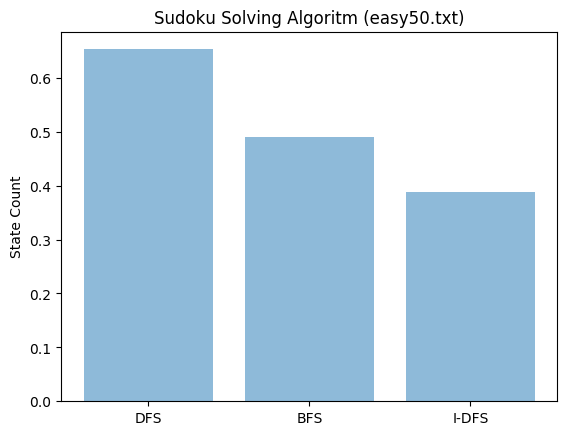

In [10]:
"""
Following 3 lines generates data set using easy50.txt file, counts the time, plots table and bar graph.
"""
easy_all_results = sudoku_solver(file = "easy50.txt");

infoTableState(easy_all_results)

compareState(easy_all_results)

Test results for all cases in hard95.txt
——————————————————————————————————————————————————————————
│                 │    DFS     │    BFS     │   I-BFS    │
——————————————————————————————————————————————————————————
│  State (total)  │   12008    │    6127    │    7216    │
——————————————————————————————————————————————————————————
│   State(avg)    │   126.40   │   64.49    │   75.96    │
——————————————————————————————————————————————————————————


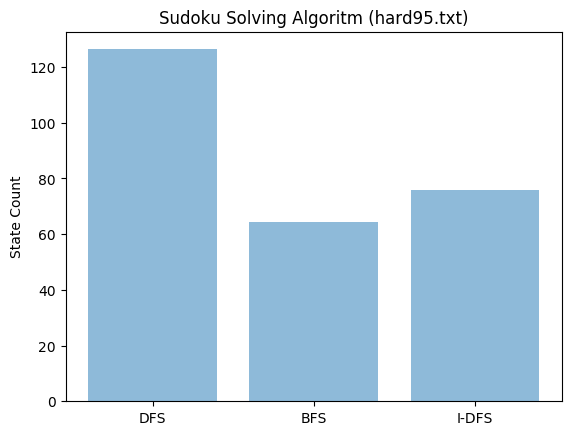

In [11]:
"""
Following 3 lines generates data set using hard95.txt file, counts the time, plots table and bar graph.
"""

hard_all_results = sudoku_solver(file = "hard95.txt")

infoTableState(hard_all_results)

compareState(hard_all_results)

As you can see, there is huge difference between test cases easy50.txt and hard95.txt. The main reason behind that is as follows;

As I mentioned before, we're propagating constraints (or newly found/guessed values) over all sudoku. As a result; for some "easy" cases, we don't need any "guess" to find solution. By only following the rules below (which I mentioned before), we can easily solve many cases on "easy50.txt."

	1: Naked Pairs/Triples 	 
	2: Hidden Pairs/Triples	 
	3: Naked/Hidden Quads	 
	4: Pointing Pairs		 
	5: Box/Line Reduction
    
    
For example; let me show some cases which we won't need any "guessing".

Test results for given case list
——————————————————————————————————————————————————————————
│                 │    DFS     │    BFS     │   I-BFS    │
——————————————————————————————————————————————————————————
│  State (total)  │     0      │     0      │     0      │
——————————————————————————————————————————————————————————
│   State(avg)    │    0.00    │    0.00    │    0.00    │
——————————————————————————————————————————————————————————


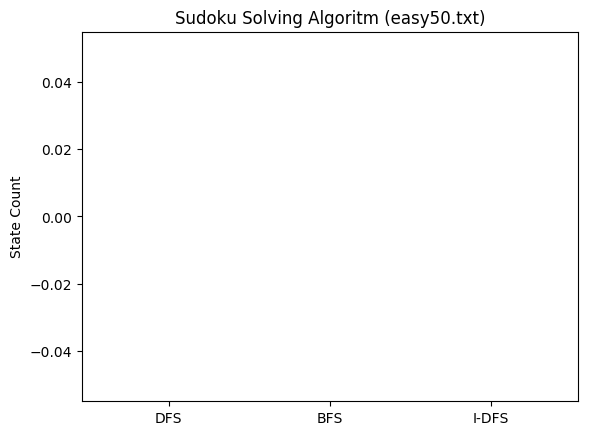

In [12]:
very_easy_all_results = sudoku_solver(file = "easy50.txt", case = range(5));

"""
Will result in 0 state count for all algoritms.
"""
infoTableState(very_easy_all_results)

compareState(very_easy_all_results)

As you can see, for the first 5 cases of "easy50.txt"; we don't need use and guessing mechanism. Surely for most of the remaining cases, we need it. And you can see results of that above.

Now, let me comment on "hard95.txt" cases.

——————————————————————————————————————————————————————————
│                 │    DFS     │    BFS     │   I-BFS    │
——————————————————————————————————————————————————————————
│  State (total)  │   12008    │    6127    │    7216    │
——————————————————————————————————————————————————————————
│   State(avg)    │   126.40   │   64.49    │   75.96    │
——————————————————————————————————————————————————————————


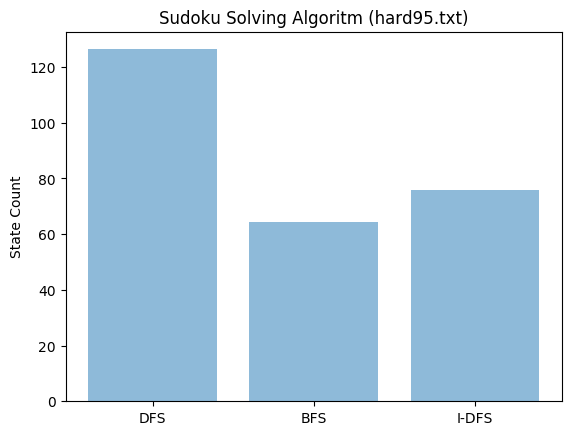

In [13]:
"""
Show tables and chart again for "hard95.txt"
"""
infoTableState(hard_all_results)

compareState(hard_all_results)

**If we compare "Depth First Search" and "Iterative Deepening Depth First Search";**

Basically these two algorithms same coding structure and methodologies. But for I-DFS we have some additional features. On my I-DFS function, I implemented "adaptive depth size" mechanism. In details, I-DFS algorithm starts with maxDepth = 8 and generates all states and tries to solve them. If it is ok, no problem; it will be certainly faster than DFS. But what if depth = 8 is not enough? Then we can increase the maxDepth and return to beginning of the problem. Using this methodology; we can improve the performance with respec to naive "Depth First Search".

**If we compare "Depth First Search" and "Best First Search";**

As "constarint propagation" step, these two functions are using same structure. But as as "search & try" step, they have different heuristics. For Depth First Search, it basically iterates from (0,0) to (8,8) by trying all possibilities. But for the Best First Search there is more complex heuristic. It creates **score list** by considering the number of the cases for each cell. After that, by starting from the cell which have probable options; it reduces the number of states and running time.

As you can see there is dramatic change for the number of states which is computed by algoritms; (total numbers)

Depth First Search = ~12000

Best First Search = ~6000

Iterative Deepening Depth First Search = ~7250

*I'm explaining the idea behind that at the question 4.*

**QUESTION 2** On average, what is the runtime for each algorithm? Explain the reason for differences.
---------------------------

——————————————————————————————————————————————————————————————————————————————
│                      │       DFS       │       BFS       │      I-BFS      │
——————————————————————————————————————————————————————————————————————————————
│    Time(total ms)    │    430.19 ms    │    426.92 ms    │    422.23 ms    │
——————————————————————————————————————————————————————————————————————————————
│     Time(avg ms)     │     8.78 ms     │     8.71 ms     │     8.62 ms     │
——————————————————————————————————————————————————————————————————————————————


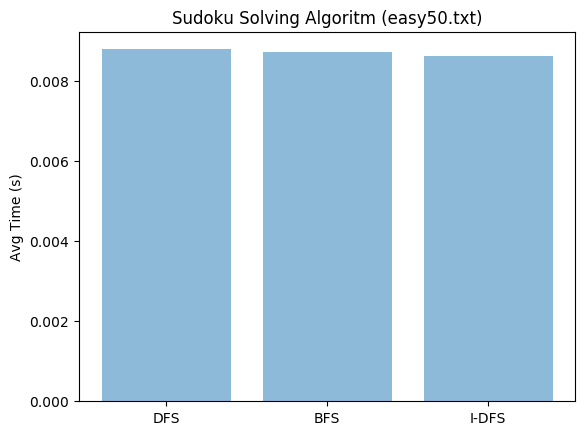

In [14]:
"""
Following 3 lines generates data set using easy50.txt file, counts the time, plots table and bar graph.
"""
# Following code line already run before.
#easy_all_results = sudoku_solver(file = "easy50.txt");

infoTableTime(easy_all_results)

compareTime(easy_all_results)

As you can see; for the easy50.txt case; I'm getting nearly same results for each algorithm. I explained the reason behind that before. (We can solve most of easy50.txt cases without any guessing, we can solve them by only constraint propagation.)

So let me comment on hard95.txt inputs.

——————————————————————————————————————————————————————————————————————————————
│                      │       DFS       │       BFS       │      I-BFS      │
——————————————————————————————————————————————————————————————————————————————
│    Time(total ms)    │   13108.19 ms   │   7967.30 ms    │   9724.89 ms    │
——————————————————————————————————————————————————————————————————————————————
│     Time(avg ms)     │    137.98 ms    │    83.87 ms     │    102.37 ms    │
——————————————————————————————————————————————————————————————————————————————


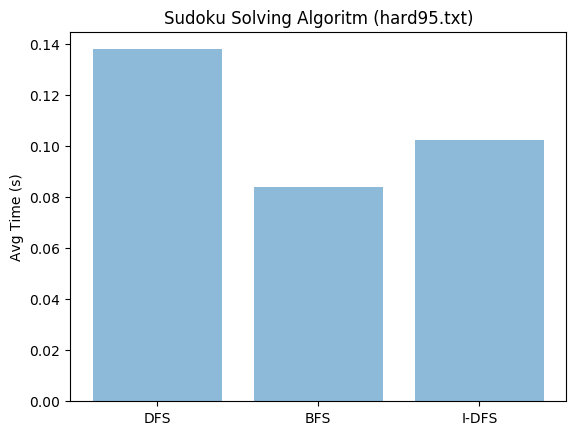

In [15]:
"""
Following 3 lines generates data set using hard95.txt file, counts the time, plots table and bar graph.
"""
# Following code line already run before.
#hard_all_results = sudoku_solver(file = "hard95.txt");

infoTableTime(hard_all_results)

compareTime(hard_all_results)

As you can see; the bar chart above is parallel with the state count chart for hard95.txt.

**What is the logic behind the time profiling differences between DFS and I-DFS?**

By commenting on this chart we can say that our improvements on I-DFS makes it faster than raw DFS algoritm. By only limiting the maximum depth of recursion, we are escaping from "worst case" scenerios and this results in better profiling results. But there is some cruicial points on this difference. How we will select the initial value of maxDepth for I-DFS? Let's do some work about it.

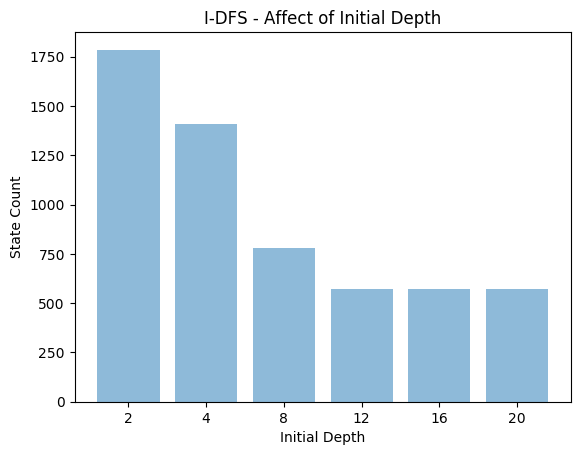

In [16]:
"""
To show the affect of initial depth on I-DFS I implemented the functions below. 
This functions try 5-10 hard cases by using different initial depth values. [2,4,8,12,16,20]
"""

depthResults = depth_example()
compareDepth(depthResults)

As you can see, using small value for the initial depth may result in bad consequences. In same way, (if there is worst case occur) larger number of initial depth may result in wasted cycles.

**What is the logic behind the time profiling differences between DFS and I-DFS?**

*(Copied from previous question START)*
As "constarint propagation" step, these two functions are using same structure. But as as "search & try" step, they have different heuristics. For Depth First Search, it basically iterates from (0,0) to (8,8) by trying all possibilities. But for the Best First Search there is more complex heuristic. It creates **score list** by considering the number of the cases for each cell. After that, by starting from the cell which have probable options; it reduces the number of states and running time.
*(Copied from previous question END)*


Actually the reason behind the faster executation is same with the reason behind least number of states. So I'll not explain it again but we may add some key information. 

Reducing the number of states does not always mean that the program is running fast. Consider the case, what if your scoring function is time consuming? So by coding our scoring function we should keep it simpler and faster.

**QUESTION 3** Is there an advantage for iterative deepening depth-first search for this problem? Why or Why not?
------------------------

Yes, surely. As i mentioned & stated before by commenting on previous graphs we can say that our improvements on I-DFS makes it faster than raw DFS algoritm. By only limiting the maximum depth of recursion, we are escaping from "worst case" scenerios and this results in better profiling results. In otherwords using Iterative Deepening Depth First Search we can focus on other states instead of always focusing on "left-most" one. 

(I explained and show this difference on previous questions. So I'll not re-type them)

Some graphs to show difference;

Please see the critical difference between DFS and I-DFS


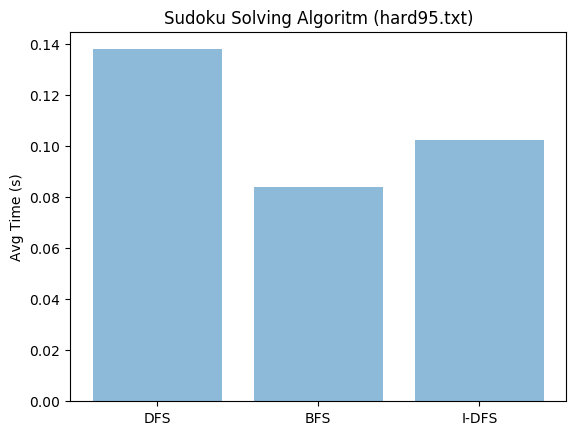

Different initial depths results in different number of states.


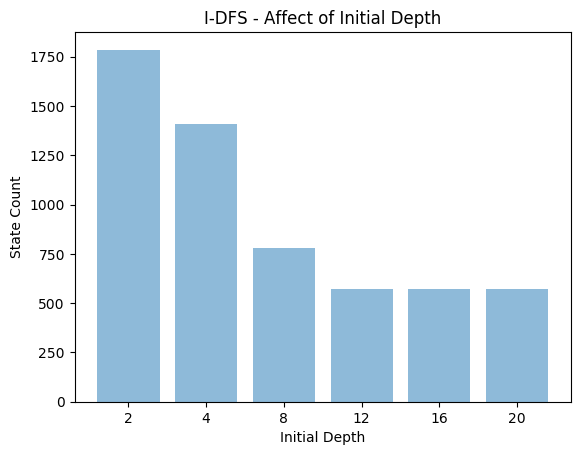

In [17]:
print("Please see the critical difference between DFS and I-DFS")
compareTime(hard_all_results)

print("Different initial depths results in different number of states.")
compareDepth(depthResults)

**QUESTION 4** What is the heuristic you used for best-first search, and what is the reasoning behind it? How effective is it? 
--------------------------

To identify "best" heuristic to find efficient way of selecting & trying (again and again) one of the possibilities of cell we need to answer following questions;

 1. Which cell do we select & try first?
 2. Which value of the cell do we select & try first?
 3. Are these selections / orderings time / cycle consuming?
 4. Can they be stuck at any point on run-time?

I tried many different methods while trying to find answers to these questions. 

**1) Assigning peer-related scores**
	As a first method, I tried to implement new function which assigns scores to each cell. Scores were based on the summation of possibilities of all peers. It means that, the cell which have peers with least possibility, will get lower score. And, by sorting this "score list" in ascending I was iterating from low score to high score. **BUT** this method results in some cycle consumation. In other words, it reduced state count but increased running time. So, I skipped to option 2.

**2) Selecting the cell with higher chance**
    After working on option 1, I realised that simpler and faster scoring (best selector) function results in faster program. So to keep it simple, I wrote a function which selects minimum option length. (Cell with 2 option or 3 option etc.) This method reduced the number of states and results in faster program. But why? What is the logic?

Let's do some math and explain it in a "logical" way. Consider following udoku cells in our system. 

Cell => Probabilities
(0,0) => 123456
(1,2) => 789
(3,4) => 5
(3,3) => 12

Sureyl, since (3,4) is solved we'll not try for it. 
If we select the cell (0,0), there is 6 different options and we will fail with a chance 5/6
If we select the cell (1,2), there is 3 different options and we will fail with a chance 2/3
If we select the cell (3,3), there is 2 different options and we will fail with a chance 1/2

So the cell (3,3) has **least** failing change. As a result, in mathematical manner selecting this cell will result in less computation & faster program.

The explations above are focusing on the "best cell selection heuristic". But what we will do after selecting cell (3,3). Will we try to solve for 1 or 2? Which one will be more logical?

Actually, for "value selection heuristic" I tried many methodologies but couldn't find any formula and logic. So I decided to keep it simple and selecting it "randomly".

**Is this method time consuming? Or can it be stuck?**

Since we're using already existing data (by only adding simple sort), this is not time consuming. Also since we can always sort cells with respect to option count. It means it can't stuck any point.

*As a summary
Cell selection heuristic: Select the cell with higher chance (lower fail chance)
Value selection heuristic: Randomize*




**QUESTION 5**  If you are to implement an A* search algorithm, what are the viable choices for $g(n)$ and $f(n)$? Can it be more effective than your implementation of best-first search? Why?
--------------------------

As far as I know, we're using A-star search algorithm to find solution with minimum (estimated or real) cost. 

In general form, A-star can be defined as follow;

$f(n) = g(n) + h(n)$

$h(n)$ is a heuristic function which is the cost to reach the goal (solved sudoku), from node (unsolved state/sudoku).

$g(n)$ is the cost which we estimate (or spent) to reach node.

So; $f(n)$ gives the solution with **least cost**.

**BUT**

A-star search algorithm depends on following features;

1) Graph Data Structure:  **OK**
We're representing the sudoku by tree. So it satisfies.

2) Solution should be "testable": **OK**
We can able to check that our state/solution is true or not. So it satisfies.

3) Check for whether we're near to solution or not: **OK**
We can count possibilities and say that "we solved %68 percent of it etc". So it can be satisfied.

4) Traverse Cost Function: **!!PROBLEM!!**
Do we have any weighted edge on our tree? Or are there any difference in cost between two different traverse operation? **NOT!** They are all EQUAL. 

So, I think that there can be more effective solutions than mine BUT they are not based on A-star. My answer is **NO** .